In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0722 12:56:27.551309 13568 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0722 12:56:27.555811 13568 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0722 12:56:27.710826 13568 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 12:56:27.712820 13568 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0722 12:56:27.950899 13568 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 160us/step - loss: 14.3519 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 4s 87us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 4s 87us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14

Epoch 3/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.7145 - acc: 0.4010 - val_loss: 1.6792 - val_acc: 0.4136
Epoch 4/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.6544 - acc: 0.4228 - val_loss: 1.6288 - val_acc: 0.4285
Epoch 5/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.6061 - acc: 0.4367 - val_loss: 1.6122 - val_acc: 0.4248
Epoch 6/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.5654 - acc: 0.4532 - val_loss: 1.5653 - val_acc: 0.4505
Epoch 7/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.5320 - acc: 0.4623 - val_loss: 1.5389 - val_acc: 0.4592
Epoch 8/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.5009 - acc: 0.4741 - val_loss: 1.5152 - val_acc: 0.4641
Epoch 9/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.4753 - acc: 0.4834 - val_loss: 1.5113 - val_acc: 0.4626
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 4s 80us/step - loss: 2.2347 - acc: 0.1849 - val_loss: 2.2254 - val_acc: 0.1875
Epoch 6/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.2206 - acc: 0.1980 - val_loss: 2.2117 - val_acc: 0.2002
Epoch 7/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.2074 - acc: 0.2117 - val_loss: 2.1989 - val_acc: 0.2119
Epoch 8/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.1949 - acc: 0.2216 - val_loss: 2.1867 - val_acc: 0.2193
Epoch 9/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.1830 - acc: 0.2308 - val_loss: 2.1751 - val_acc: 0.2249
Epoch 10/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.1716 - acc: 0.2381 - val_loss: 2.1641 - val_acc: 0.2306
Epoch 11/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.1607 - acc: 0.2441 - val_loss: 2.1536 - val_acc: 0.2405
Epoch 12/50
50000/50000 [=========================

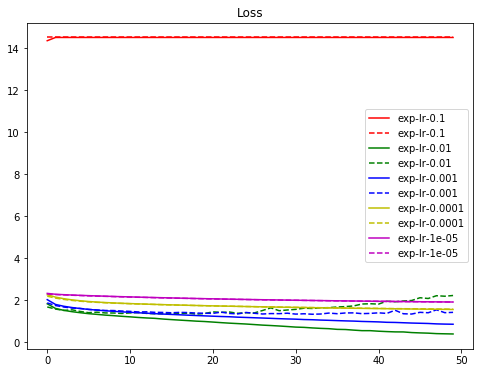

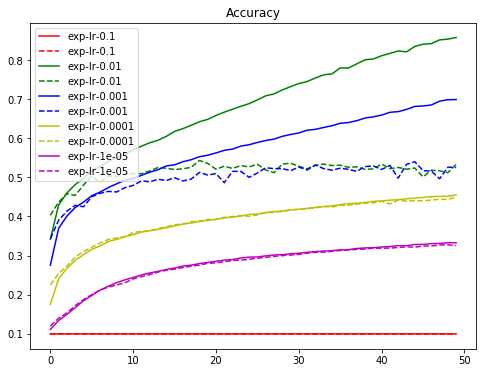

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# Homework
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

## 不使用momentum

In [5]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0

In [8]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0723 12:55:22.763823  3720 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 12:55:22.775727  3720 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 12:55:22.858190  3720 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 12:55:22.960069  3720 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a futu

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.0636 - acc: 0.2728 - val_loss: 1.9411 - val_acc: 0.3146
Epoch 2/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.8744 - acc: 0.3398 - val_loss: 1.8797 - val_acc: 0.3230
Epoch 3/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.8100 - acc: 0.3626 - val_loss: 1.8067 - val_acc: 0.3581
Epoch 4/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.7637 - acc: 0.3775 - val_loss: 1.7852 - val_acc: 0.3668
Epoch 5/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.7278 - acc: 0.3938 - val_loss: 1.7162 - val_acc: 0.3906
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.6979 - acc: 0.4033 - val_loss: 1.6838 - val_acc: 0.4081
Epoch 7/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.6732 - acc: 0.4117 - val_loss: 1.6766 - val_acc

Epoch 4/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.2708 - acc: 0.1500 - val_loss: 2.2675 - val_acc: 0.1518
Epoch 5/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.2625 - acc: 0.1597 - val_loss: 2.2596 - val_acc: 0.1608
Epoch 6/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.2547 - acc: 0.1684 - val_loss: 2.2521 - val_acc: 0.1695
Epoch 7/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.2473 - acc: 0.1770 - val_loss: 2.2449 - val_acc: 0.1782
Epoch 8/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.2402 - acc: 0.1856 - val_loss: 2.2379 - val_acc: 0.1873
Epoch 9/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.2332 - acc: 0.1931 - val_loss: 2.2311 - val_acc: 0.1910
Epoch 10/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.2264 - acc: 0.2005 - val_loss: 2.2243 - val_acc: 0.1977
Epoch 11/50
50000/50000 [===============

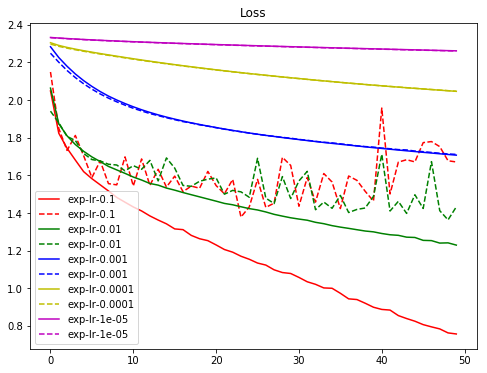

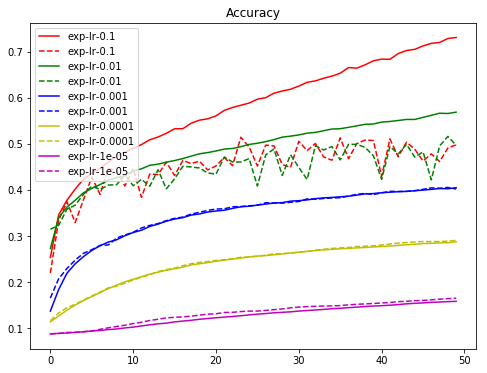

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 不使用 nesterov

In [10]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [11]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.8879 - acc: 0.3170 - val_loss: 1.7461 - val_acc: 0.3712
Epoch 2/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.6899 - acc: 0.3940 - val_loss: 1.6178 - val_acc: 0.4235
Epoch 3/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.5954 - acc: 0.4282 - val_loss: 1.5787 - val_acc: 0.4260
Epoch 4/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.5275 - acc: 0.4554 - val_loss: 1.5500 - val_acc: 0.4422
Epoch 5/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.4943 - acc: 0.4647 - val_loss: 1.4941 - val_acc: 0.4688
Epoch 6/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.4575 - acc: 0.4783 - val_loss: 1.4591 - val_acc: 0.4790
Epoch 7/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.4194 - acc: 0.4915 - val_loss: 1.4793 - val_acc

Epoch 4/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.0189 - acc: 0.2935 - val_loss: 1.9946 - val_acc: 0.3045
Epoch 5/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.9714 - acc: 0.3136 - val_loss: 1.9526 - val_acc: 0.3172
Epoch 6/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.9336 - acc: 0.3290 - val_loss: 1.9196 - val_acc: 0.3321
Epoch 7/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.9029 - acc: 0.3395 - val_loss: 1.8917 - val_acc: 0.3437
Epoch 8/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.8777 - acc: 0.3491 - val_loss: 1.8695 - val_acc: 0.3503
Epoch 9/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8564 - acc: 0.3565 - val_loss: 1.8512 - val_acc: 0.3577
Epoch 10/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8383 - acc: 0.3591 - val_loss: 1.8334 - val_acc: 0.3638
Epoch 11/50
50000/50000 [===============

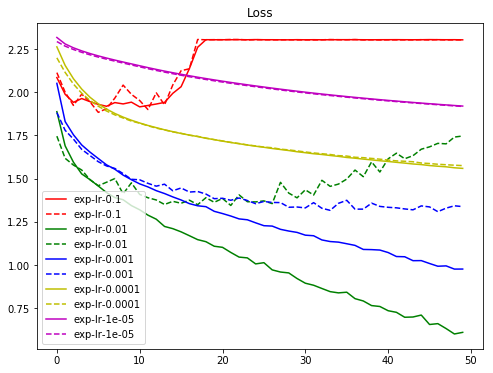

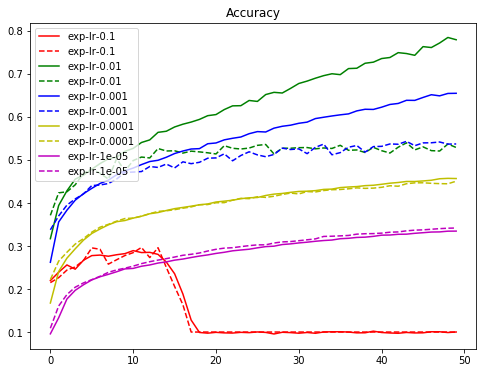

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()